<a href="https://colab.research.google.com/github/artemkush1/ML_test_all_models_on_pulsar/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cd '/content/drive/My Drive/Colab Notebooks/pulsar_prediction'

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *
from sklearn.metrics import f1_score

PATH = '/content/drive/My Drive/Colab Notebooks/pulsar_prediction/'

In [80]:
df = pd.read_csv(PATH + 'pulsar_stars.csv')
df = df.fillna(0)
df

Mean of the integrated profile  ...  target_class
0                           140.562500  ...             0
1                           102.507812  ...             0
2                           103.015625  ...             0
3                           136.750000  ...             0
4                            88.726562  ...             0
...                                ...  ...           ...
17893                       136.429688  ...             0
17894                       122.554688  ...             0
17895                       119.335938  ...             0
17896                       114.507812  ...             0
17897                        57.062500  ...             0

[17898 rows x 9 columns]

In [81]:
scaleCoder = StandardScaler()
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

X_norm = scaleCoder.fit_transform(df.values[:, :-1])
y_norm = y


X_norm_train, X_norm_test,\
y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size=0.25,
                                             random_state=42)

print(X_train.shape, X_test.shape)

(13423, 8) (4475, 8)


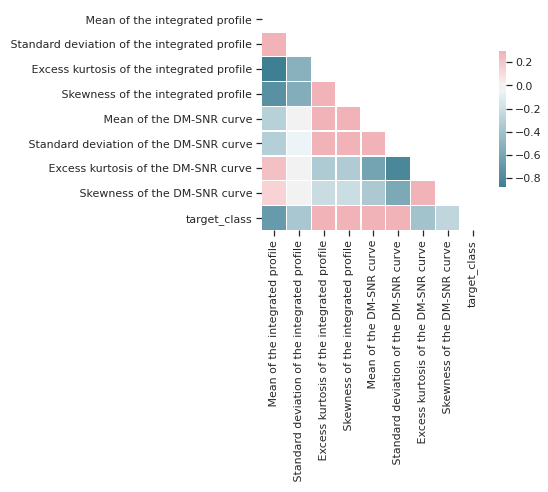

In [82]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, mask=mask,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 432x288 with 0 Axes>

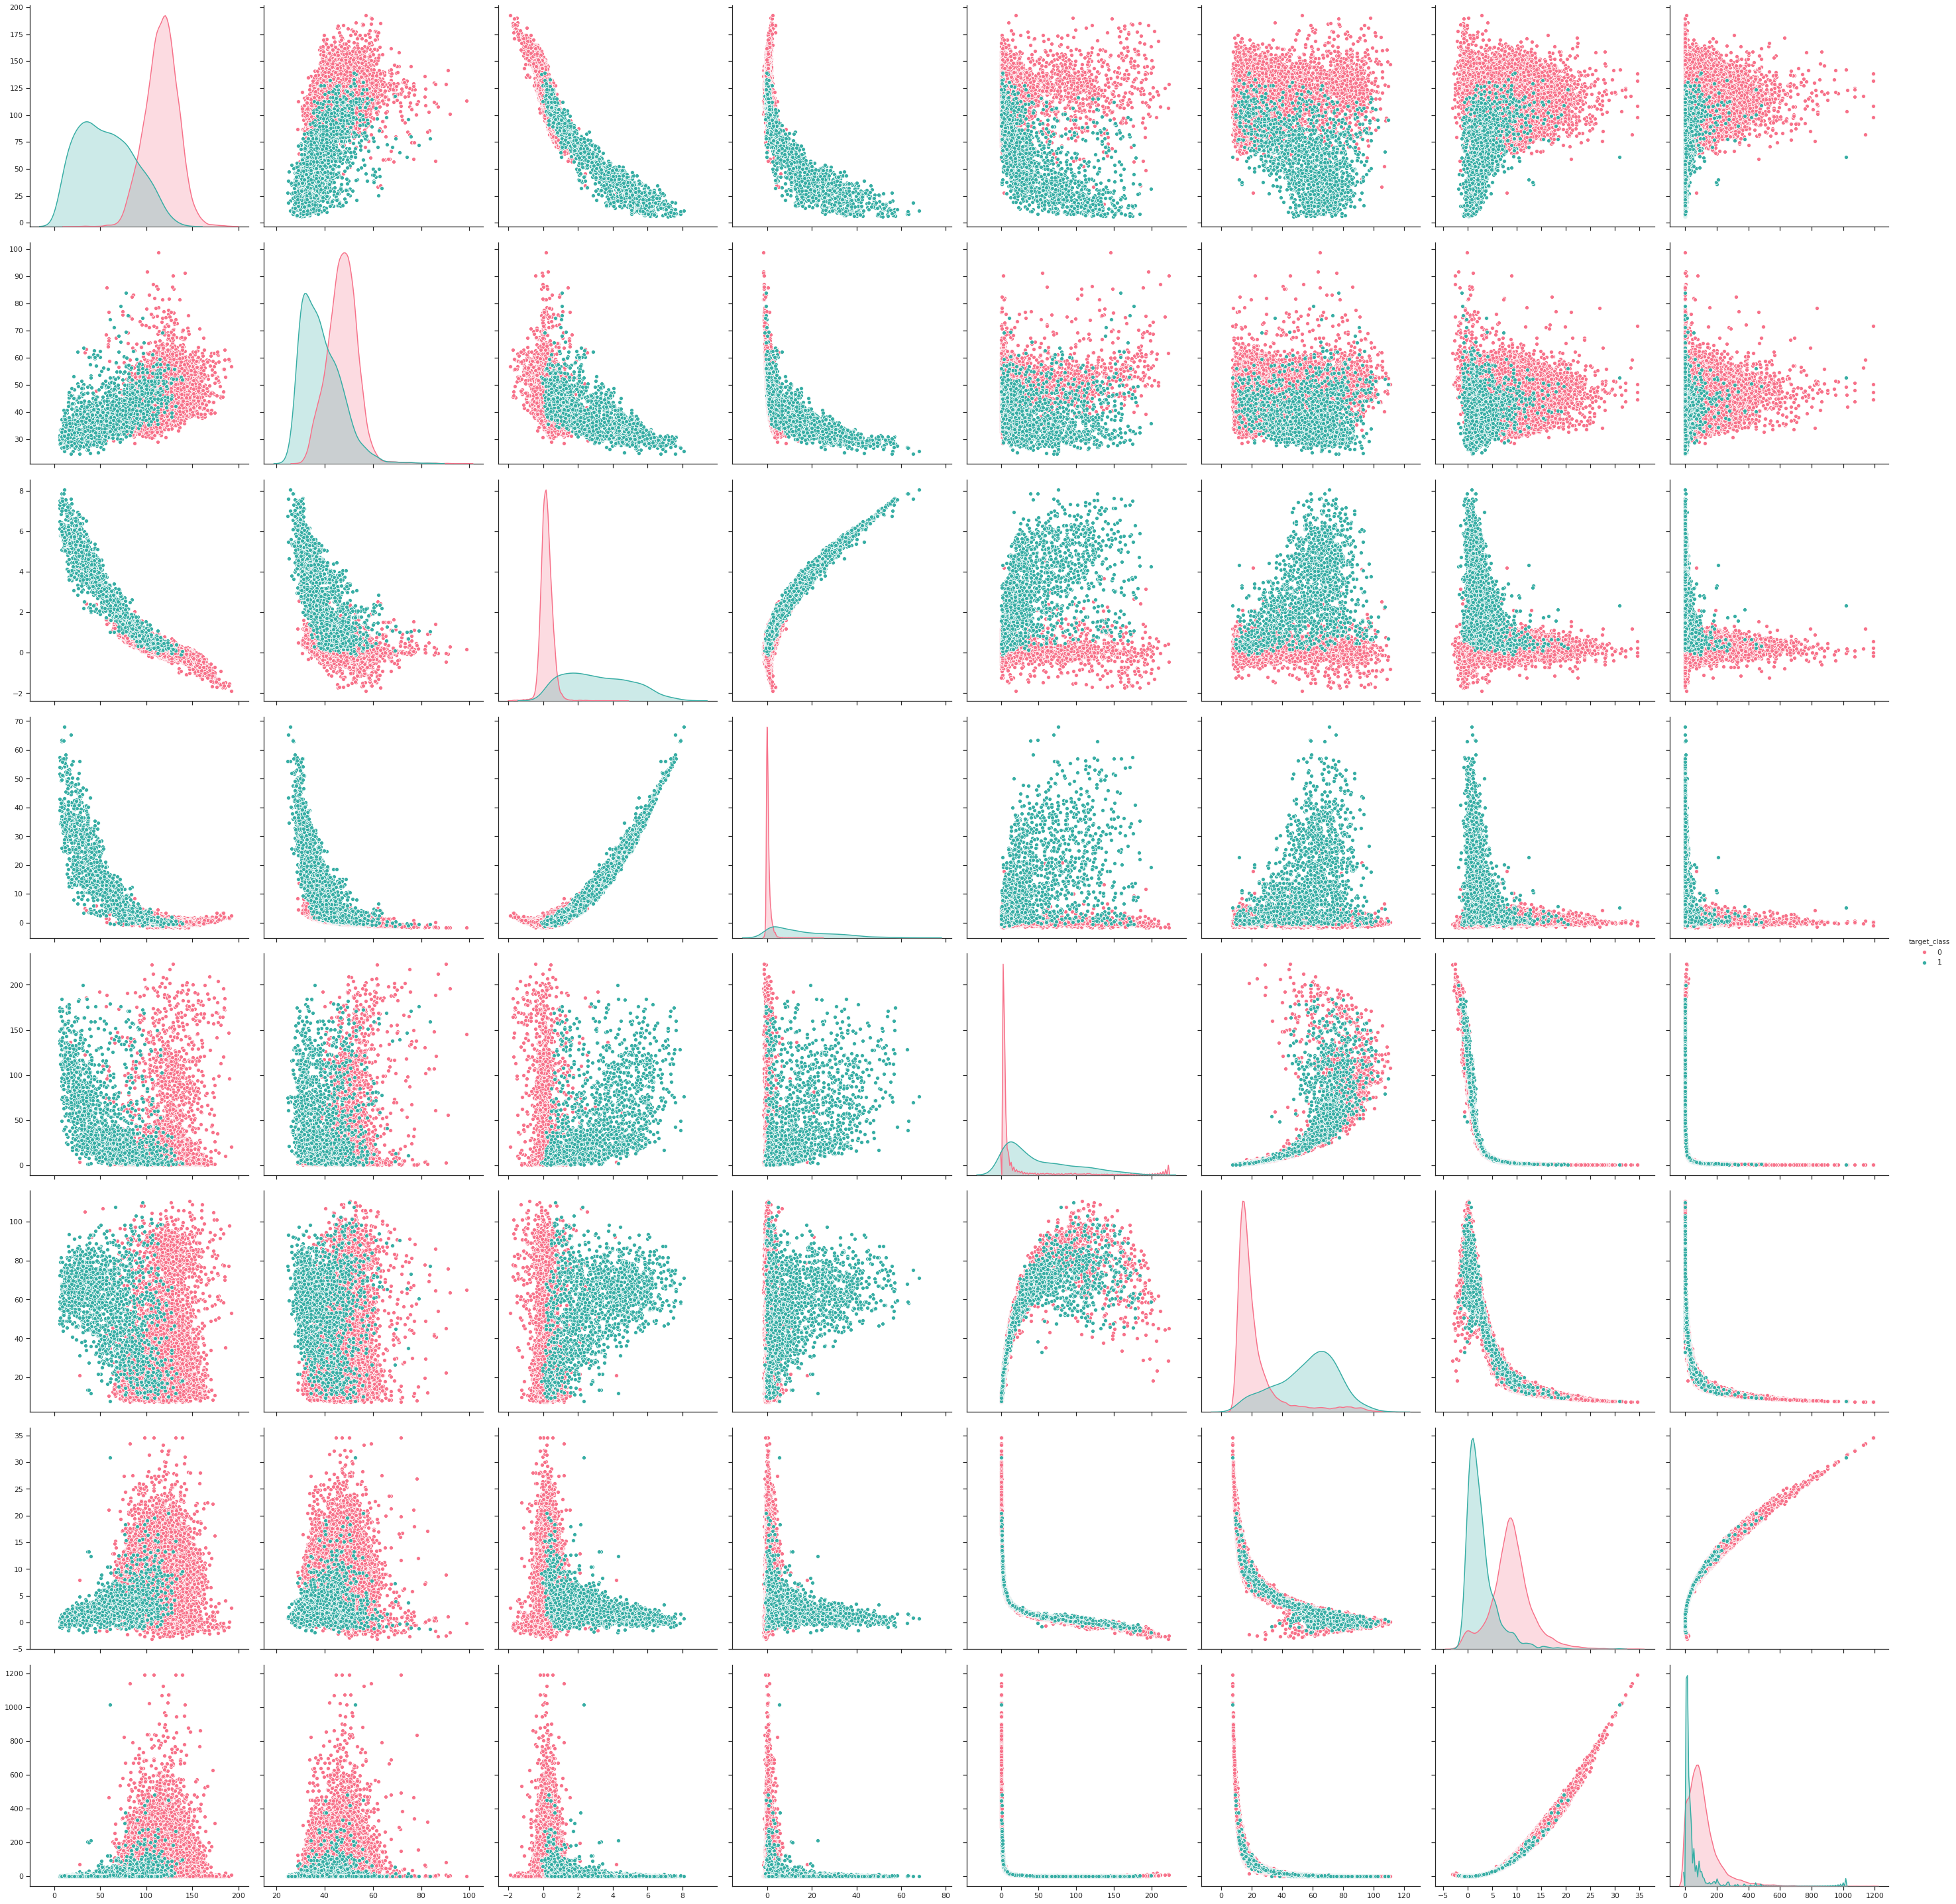

In [25]:
sns.set(style="ticks", color_codes=True)
plt.figure()
p = sns.pairplot(df, hue="target_class", palette="husl",
                 height=5, corner=False)  # kind="reg"
p.set(xlabel='', ylabel='')
plt.show()

# Model 1 - LDA

In [251]:
from sklearn.discriminant_analysis import *
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)

lda.fit(X_norm_train, y_norm_train)
lda.score(X_norm_test, y_norm_test)

0.9743016759776536

# Model 2 - DummyClassifier

In [252]:
from sklearn.dummy import *
dc = DummyClassifier(strategy='most_frequent', random_state=None, constant=None)

dc.fit(X_norm_train, y_norm_train)
dc.score(X_norm_test, y_norm_test)

0.9094972067039107

# Model 3 - Linear

In [253]:
from sklearn.linear_model import *

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=None, random_state=1,
                    learning_rate='optimal', eta0=0.0, power_t=0.5,
                    early_stopping=False, validation_fraction=0.1,
                    n_iter_no_change=5, class_weight=None, warm_start=False,
                    average=False)
sgd.fit(X_train, y_train)
print("SGD (berfore norm)\t", sgd.score(X_test, y_test))
sgd.fit(X_norm_train, y_norm_train)
print("SGD (after norm)\t", sgd.score(X_norm_test, y_norm_test))

rc = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False,
                     copy_X=True, max_iter=None, tol=0.001, class_weight=None,
                     solver='auto', random_state=1)
rc.fit(X_train, y_train)
print("RC (berfore norm)\t", rc.score(X_test, y_test))
rc.fit(X_norm_train, y_norm_train)
print("RC (after norm) \t", rc.score(X_norm_test, y_norm_test))

pc = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000,
                tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None,
                random_state=0, early_stopping=False, validation_fraction=0.1,
                n_iter_no_change=5, class_weight=None, warm_start=False)
pc.fit(X_train, y_train)
print("PC (berfore norm)\t", pc.score(X_test, y_test))
pc.fit(X_norm_train, y_norm_train)
print("PC (after norm) \t", pc.score(X_norm_test, y_norm_test))

pca = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000,
      tol=0.001, early_stopping=False, validation_fraction=0.1,
      n_iter_no_change=5, shuffle=True, verbose=0, loss='hinge', n_jobs=None,
      random_state=585, warm_start=False, class_weight=None, average=False)
pca.fit(X_train, y_train)
print("PCA (berfore norm)\t", pca.score(X_test, y_test))
pca.fit(X_norm_train, y_norm_train)
print("PCA (after norm)\t", pca.score(X_norm_test, y_norm_test))



SGD (berfore norm)	 0.9756424581005586
SGD (after norm)	 0.9787709497206704
RC (berfore norm)	 0.9705027932960893
RC (after norm) 	 0.9705027932960893
PC (berfore norm)	 0.9745251396648045
PC (after norm) 	 0.9740782122905028
PCA (berfore norm)	 0.9754189944134078
PCA (after norm)	 0.9709497206703911


# Model 4 - Ensembles

In [254]:
from sklearn.ensemble import *
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=7,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
        random_state=2, verbose=0, warm_start=False, class_weight=None,
        ccp_alpha=0.0, max_samples=None)
rfc.fit(X_train, y_train)
print("rfc (before norm)\t", rfc.score(X_test, y_test))
rfc.fit(X_norm_train, y_norm_train)
print("rfc (after norm)\t", rfc.score(X_norm_test, y_norm_test))

rfc (before norm)	 0.9801117318435755
rfc (after norm)	 0.9801117318435755


In [255]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.02,
    n_estimators=100, subsample=1.0, criterion='friedman_mse',
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None,
    random_state=2, max_features=None, verbose=0, max_leaf_nodes=None,
    warm_start=False, presort='deprecated', validation_fraction=0.1,
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gbc.fit(X_train, y_train)
print("gbc (before norm)\t", gbc.score(X_test, y_test))
gbc.fit(X_norm_train, y_norm_train)
print("gbc (after norm)\t", gbc.score(X_norm_test, y_norm_test))

gbc (before norm)	 0.9814525139664805
gbc (after norm)	 0.9814525139664805


# Model 5 - KNN

Best param: 16
KNN (before normalize):	 0.9740782122905028


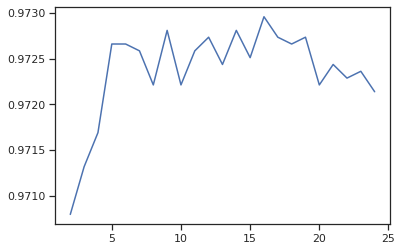

Best param: 5
KNN (after normalize):	 0.9796648044692737


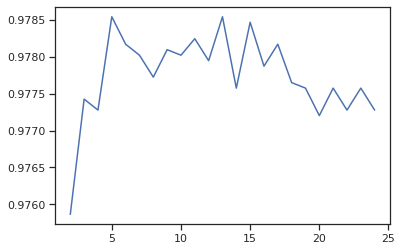

In [256]:
from sklearn.neighbors import *

parameters = {'n_neighbors': [x for x in range(2, 25)]}


knn = KNeighborsClassifier(weights='uniform', algorithm='auto',
        leaf_size=5, p=2, metric='minkowski', metric_params=None,
        n_jobs=None)
knn = GridSearchCV(knn, parameters)

knn.fit(X_train, y_train)
print('Best param:', knn.best_params_['n_neighbors'])
print("KNN (before normalize):\t", knn.score(X_test, y_test))
plt.plot([knn.cv_results_['params'][i]['n_neighbors'] for i in range(len(knn.cv_results_['params']))],
          knn.cv_results_['mean_test_score'])
plt.show()

knn.fit(X_norm_train, y_norm_train)
print('Best param:', knn.best_params_['n_neighbors'])
print("KNN (after normalize):\t", knn.score(X_norm_test, y_norm_test))
plt.plot([knn.cv_results_['params'][i]['n_neighbors'] for i in range(len(knn.cv_results_['params']))],
          knn.cv_results_['mean_test_score'])
plt.show()

# Model 6 - Naive Bayes

In [257]:
from sklearn.naive_bayes import *

gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)
print("gnb\t", gnb.score(X_test, y_test))
gnb.fit(X_norm_train, y_norm_train)
print("gnb\t", gnb.score(X_norm_test, y_norm_test))

gnb	 0.9474860335195531
gnb	 0.9474860335195531


# Model 7 - XGBoost & LGBM

xgb (before norm)	 0.9801117318435755
xgb (after norm)	 0.9801117318435755


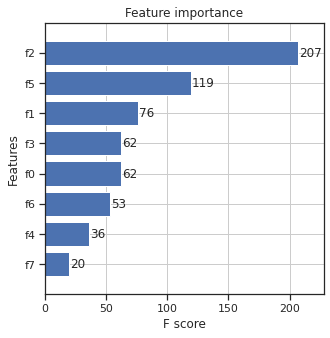

In [258]:
import xgboost as xgb

xgbm = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
    silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1,
    nthread=None)
xgbm.fit(X_train, y_train)
print("xgb (before norm)\t", xgbm.score(X_test, y_test))
xgbm.fit(X_norm_train, y_norm_train)
print("xgb (after norm)\t", xgbm.score(X_norm_test, y_norm_test))

fig, ax = plt.subplots(figsize=(5,5))
xgb.plot_importance(xgbm, max_num_features=None, height=0.8, ax=ax)
plt.show()

lgb	 0.9812290502793296
lgb	 0.9812290502793296


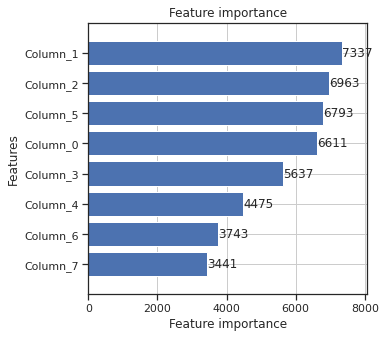

In [259]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(boosting_type='goss', num_leaves=31, max_depth=-1,
    learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,
    objective=None, class_weight=None, min_split_gain=0.0,
    min_child_weight=0.001, min_child_samples=20, subsample=1.0,
    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,reg_lambda=0.0,
    random_state=None, n_jobs=-1, silent=True, importance_type='gain')

lgbm.fit(X_train, y_train)
print("lgb\t", lgbm.score(X_test, y_test))
lgbm = lgb.LGBMClassifier(boosting_type='goss', num_leaves=31, max_depth=-1,
    learning_rate=0.01, n_estimators=1500, subsample_for_bin=200000,
    objective=None, class_weight=None, min_split_gain=0.0,
    min_child_weight=0.001, min_child_samples=20, subsample=1.0,
    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,reg_lambda=0.0,
    random_state=None, n_jobs=-1, silent=True, importance_type='gain')
lgbm.fit(X_norm_train, y_norm_train)
print("lgb\t", lgbm.score(X_norm_test, y_norm_test))


fig, ax = plt.subplots(figsize=(5,5))
lgb.plot_importance(lgbm, max_num_features=None, height=0.8, ax=ax)
plt.show()

# Model 8 - CatBoost

In [260]:
!pip install catboost

In [261]:
from catboost import CatBoostClassifier, Pool
catb = CatBoostClassifier(iterations=None,
    learning_rate=None, depth=None, l2_leaf_reg=None,
    model_size_reg=None, rsm=None, loss_function=None,
    border_count=None, feature_border_type=None,
    per_float_feature_quantization=None, input_borders=None,
    output_borders=None, fold_permutation_block=None,
    od_pval=None, od_wait=None, od_type=None, nan_mode=None,
    counter_calc_method=None, leaf_estimation_iterations=None,
    leaf_estimation_method=None, thread_count=None,
    random_seed=None, use_best_model=None, verbose=False,
    logging_level=None, metric_period=None,
    ctr_leaf_count_limit=None, store_all_simple_ctr=None,
    max_ctr_complexity=None, has_time=None, allow_const_label=None,
    classes_count=None, class_weights=None, one_hot_max_size=None,
    random_strength=None, name=None, ignored_features=None,
    train_dir=None, custom_loss=None, custom_metric=None,
    eval_metric=None, bagging_temperature=None, save_snapshot=None,
    snapshot_file=None, snapshot_interval=None,
    fold_len_multiplier=None, used_ram_limit=None, gpu_ram_part=None,
    allow_writing_files=None, final_ctr_computation_mode=None,
    approx_on_full_history=None, boosting_type='Ordered',
    simple_ctr=None, combinations_ctr=None, per_feature_ctr=None,
    task_type=None, device_config=None, devices=None,
    bootstrap_type=None, subsample=None, sampling_unit=None,
    dev_score_calc_obj_block_size=None, max_depth=None, n_estimators=None,
    num_boost_round=None, num_trees=None, colsample_bylevel=None,
    random_state=None, reg_lambda=None, objective=None, eta=None,
    max_bin=None, scale_pos_weight=None, gpu_cat_features_storage=None,
    data_partition=None, metadata=None, early_stopping_rounds=None,
    cat_features=None,grow_policy=None, min_data_in_leaf=None,
    min_child_samples=None, max_leaves=None, num_leaves=None,
    score_function=None, leaf_estimation_backtracking=None,
    ctr_history_unit=None, monotone_constraints=None,
    model_shrink_rate=None, model_shrink_mode=None,
    langevin=None, diffusion_temperature=None, boost_from_average=None,
    text_features=None, tokenizers=None, dictionaries=None,
    feature_calcers=None, text_processing=None)


catb.fit(X_train, y_train, plot=True)
print("CatBoost (before norm)\t", catb.score(X_test, y_test))
catb.fit(X_norm_train, y_norm_train, plot=True)
print("CatBoost (after norm)\t", catb.score(X_norm_test, y_norm_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost (before norm)	 0.9818994413407821


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost (after norm)	 0.9818994413407821


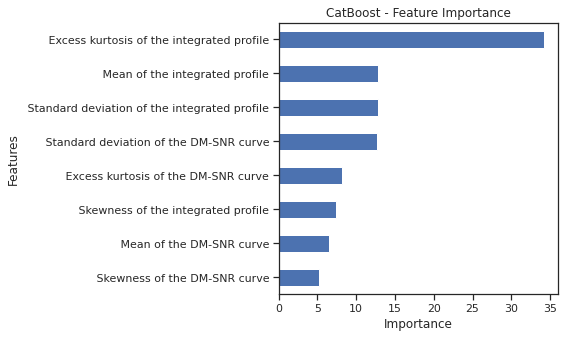

In [111]:
fea_imp = pd.DataFrame({'imp': catb.feature_importances_, 'col': df.columns[:-1]})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(5, 5), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

# Model 9 - Neuro

In [0]:
import tensorflow as tf
from keras import backend as K
import os
import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, PReLU
from keras.optimizers import Adam

"""
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)
"""

from sklearn.metrics import fbeta_score


def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 2
    y_pred = K.clip(y_pred, 0, 1)
    y_pred_bin = K.round(y_pred + threshold_shift)
    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    beta_squared = beta ** 2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

In [0]:

def create_model():
    return keras.Sequential(
        [
         Conv1D(filters=64, kernel_size=2, input_shape=(8, 1)),
         PReLU(),
         MaxPool1D(pool_size=2),
         Dropout(0.2),
         Conv1D(filters=32, kernel_size=2),
         PReLU(),
         MaxPool1D(pool_size=2),
         #tf.keras.layers.Dropout(0.2),
         #tf.keras.layers.Dense(32, activation='relu'),
         #tf.keras.layers.Dropout(0.1),
         #tf.keras.layers.Dense(16, activation='relu'),
         #tf.keras.layers.Dropout(0.1),
         Dropout(0.2),
         Flatten(),
         Dense(32, activation='relu'),
         Dropout(0.2),
         Dense(1, activation='sigmoid')])

# with strategy.scope():
model = create_model()
print(model.summary())
model.compile(optimizer=Adam(learning_rate=0.0007),
                loss='binary_crossentropy',
                metrics=['acc'])



X_train_ = X_norm_train.reshape(-1, 8, 1)
y_train_ = y_norm_train.reshape(-1, 1)
X_test_ = X_norm_test.reshape(-1, 8, 1)
y_test_ = y_norm_test.reshape(-1, 1)

history = model.fit(X_train_, y_train_,
          epochs=300, batch_size=256, callbacks=[ModelCheckpoint(PATH + 'weights', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)],
          validation_data=(X_test_, y_test_),
          verbose=1)
model.load_weights(PATH + 'weights')

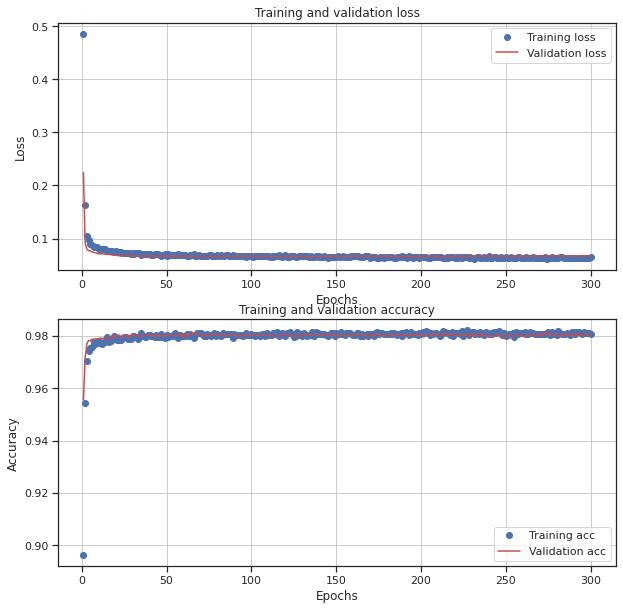

0.9814525246620178

In [250]:
def ploting():
    # print(history.history.keys())
    ac = []
    for i in history.history.keys():
        ac.append(i)
    loss = history.history[ac[2]]
    val_loss = history.history[ac[0]]
    acc = history.history[ac[3]]
    val_acc = history.history[ac[1]]
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(epochs, loss, 'bo', label='Training loss')
    ax1.plot(epochs, val_loss, 'b', label='Validation loss', color='r')
    ax1.set_title('Training and validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(epochs, acc, 'bo', label='Training acc')
    ax2.plot(epochs, val_acc, 'b', label='Validation acc', color='r')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    for ax in fig.axes:
        ax.grid(True)
    plt.savefig(PATH + 'graph')
    plt.show()

ploting()
model.evaluate(X_test_, y_test_, verbose=0)[-1]

# Rating

In [0]:
import operator
dict_ = {
    'LDA': lda.score(X_norm_test, y_norm_test),
    'DummyClassifier': dc.score(X_norm_test, y_norm_test),
    'SGDClassifier': sgd.score(X_norm_test, y_norm_test),
    'RidgeClassifier': rc.score(X_norm_test, y_norm_test),
    'Perceptron(SKLearn)': pc.score(X_norm_test, y_norm_test),
    'PassiveAggressiveCl': pca.score(X_norm_test, y_norm_test),
    'RandomForestCl': rfc.score(X_norm_test, y_norm_test),
    "GradientBoostingCl": gbc.score(X_norm_test, y_norm_test),
    "KNN": knn.score(X_norm_test, y_norm_test),
    "GaussianNB": gnb.score(X_norm_test, y_norm_test),
    "XGBoost": xgbm.score(X_norm_test, y_norm_test),
    "LGBMBoost": lgbm.score(X_norm_test, y_norm_test),
    "CatBoost": catb.score(X_norm_test, y_norm_test),
    "Neuro CNN": model.evaluate(X_test_, y_test_, verbose=0)[-1]
}

sorted_ = sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)
#dict(sorted_)

[<matplotlib.patches.Rectangle object at 0x7f12777bae80>, <matplotlib.patches.Rectangle object at 0x7f12777bac88>, <matplotlib.patches.Rectangle object at 0x7f12777c8400>, <matplotlib.patches.Rectangle object at 0x7f12777c8780>, <matplotlib.patches.Rectangle object at 0x7f12777c8a90>, <matplotlib.patches.Rectangle object at 0x7f12777c8da0>, <matplotlib.patches.Rectangle object at 0x7f12777d30f0>, <matplotlib.patches.Rectangle object at 0x7f12777d3400>]


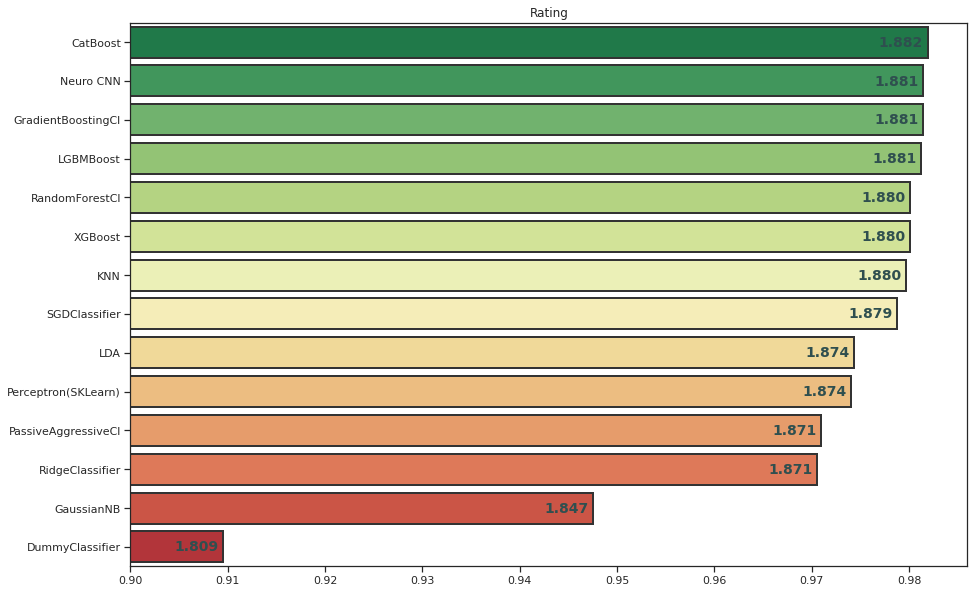

In [300]:
# visualization
y = [x[1] for x in sorted_]
labels = [x[0] for x in sorted_]


shift = 0.9

plt.figure(figsize=(15, 10))
graph = sns.barplot(x=(np.asarray(y) - shift), y=labels,
                    palette=sns.color_palette("RdYlGn_r", len(y)),
                    edgecolor=".2", linewidth=2)
plt.xticks([i / 100 for i in range(0, 9)], ["%.2f" % (i / 100 + shift) for i in range(0, 9)])

print(ax.patches)

for i, v in enumerate(y):
    graph.text(v - shift - 0.005, i + 0.105, "%.3f" % (v + shift), color='darkslategray', fontweight='bold', size=14)
plt.title('Rating')


plt.savefig(PATH + 'rating_models', dpi=150)
plt.show()